In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gen_euler_estimator import EulerEstimator
import math

In [2]:
V_0 = 0
n_0 = 0.317676914
m_0 = 0.0529324854
h_0 = 0.596120753
C = 1.0
V_Na = 115
V_K = -12
V_L = 10.6
_g_Na = 120
_g_K = 36
_g_L = 0.3

In [3]:
def alpha_n(t, state):
    print('alpha_n', (0.01 * (10 - state['V'])) / (math.e ** (0.1 * (10 - state['V'])) - 1))
    return (0.01 * (10 - state['V'])) / (math.exp(0.1 * (10 - state['V'])) - 1)

def alpha_m(t, state):
    return (0.1 * (25 - state['V'])) / (math.exp(0.1 * (25 - state['V'])) - 1)

def alpha_h(t, state):
    return 0.07 * math.exp(-1 * state['V'] / 20)

def beta_n(t, state):
    print('beta_n', 0.125 * math.exp(-1 * state['V'] / 80))
    return 0.125 * math.exp(-1 * state['V'] / 80)

def beta_m(t, state):
    return 4 * math.exp(-1 * state['V'] / 18)

def beta_h(t, state):
    return 1 / (math.exp(0.1 * (30 - state['V'])) + 1)

In [4]:
def g_Na(t, state):
    return _g_Na * state['m'] ** 3 * state['h']

def g_K(t, state):
    return _g_K * state['n'] ** 4

def g_L(t, state):
    return _g_L

In [5]:
def I_Na(t, state):
    return g_Na(t, state) * (state['V'] - V_Na)

def I_K(t, state):
    return g_K(t, state) * (state['V'] - V_K)

def I_L(t, state):
    return g_L(t, state) * (state['V'] - V_L)

In [6]:
def s(t, state):
    if t in list(list(range(10, 12)) + list(range(20, 22)) + list(range(30, 41)) + list(range(50, 21)) + list(range(53, 55)) + list(range(56, 58)) + list(range(59, 61)) + list(range(62, 64)) + list(range(65, 67))):
        return 150
    else:
        return 0

In [7]:
def dV_dt(t, state):
    return s(t, state) - I_Na(t, state) - I_K(t, state) - I_L(t, state)

def dn_dt(t, state):
    print('   ', alpha_n(t, state) * (1 - state['n']), beta_n(t, state) * state['n'])
    return alpha_n(t, state) * (1 - state['n']) - beta_n(t, state) * state['n']

def dm_dt(t, state):
    return alpha_m(t, state) * (1 - state['m']) - beta_m(t, state) * state['m']

def dh_dt(t, state):
    return alpha_h(t, state) * (1 - state['h']) - beta_h(t, state) * state['h']

In [8]:
derivatives = {
    'V': dV_dt,
    'n': dn_dt,
    'm': dm_dt,
    'h': dh_dt
}

initial_state = {'V': V_0, 'n': n_0, 'm': m_0, 'h': h_0}
hh_model = EulerEstimator(derivatives)
estimated_points = hh_model.calc_estimated_points((0, initial_state), 0.01, 8000)

alpha_n 0.05819767068693265
beta_n 0.125
    0.03970961426111963 0.03970961425
alpha_n 0.05819767068693265
beta_n 0.125
alpha_n 0.05819767068693265
beta_n 0.125
    0.03970961426111963 0.03970961425
alpha_n 0.05819767068693265
beta_n 0.125
alpha_n 0.05819767068693265
beta_n 0.125
    0.03970961426111963 0.03970961425
alpha_n 0.05819767068693265
beta_n 0.125
alpha_n 0.05819767068693265
beta_n 0.125
    0.03970961426111963 0.03970961425
alpha_n 0.05819767068693265
beta_n 0.125
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
    0.039709621742337504 0.03970961264315756
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
    0.039709621742337504 0.03970961264315756
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
    0.039709621742337504 0.03970961264315756
alpha_n 0.05819768165127565
beta_n 0.12499999494185361
alpha_n 0.05819768165127565
beta_n 0.12499999494185361


(0.0, 1.0)

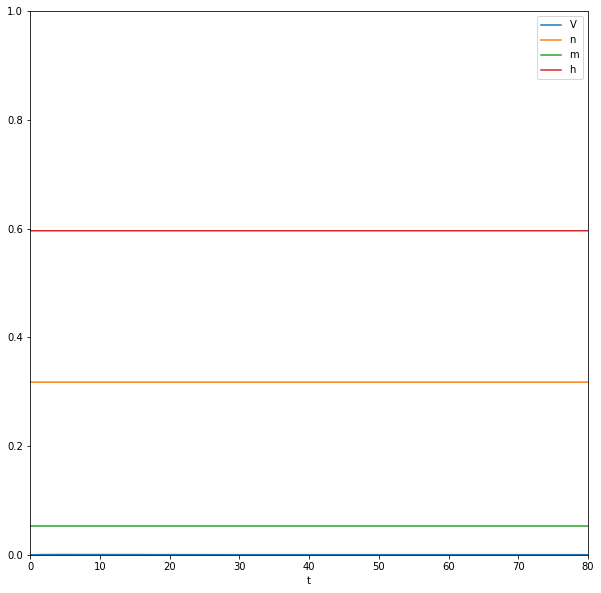

In [9]:
state_dict = {function: [point[1][function] for point in estimated_points] for function in hh_model.functions}
t_list = [point[0] for point in estimated_points]
df_dict = {'t': t_list}
df_dict.update(state_dict)
df = pd.DataFrame(df_dict)
plot = df.plot(x="t", figsize=(10, 10))
plt.xlim((0,80))
plt.ylim((0,1))